In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = {
    'glue-rte': {
        'open_llama-2-3b': [49.9, 55.2, 52.5, 55.1, 47.9],
        'llama-2-7b': [67.5, 63.7, 64.3, 60.8, 65.0],
        'llama-2-13b': [77.9, 76.4, 76.4, 72.4, 70.4],
        'llama-2-70b': [84.5, 82.4, 79.8, 76.9, 63.4]
    },
    'glue-sst2': {
        'open_llama-2-3b': [87.2, 72.2, 61.5, 65.8, 62.3],
        'llama-2-7b': [89.8, 80.4, 86.4, 66.9, 53.4],
        'llama-2-13b': [93.3, 92.4, 87.0, 63.5, 59.3],
        'llama-2-70b': [95.8, 94.4, 85.2, 37.3, 10.5]
    },
    'glue-qqp': {
        'open_llama-2-3b': [62.8, 53.8, 46.0, 45.9, 44.6],
        'llama-2-7b': [63.7, 53.3, 46.4, 38.4, 37.5],
        'llama-2-13b': [66.8, 60.0, 49.7, 47.2, 42.9],
        'llama-2-70b': [80.7, 81.8, 72.4, 63.4, 39.4]
    },
    'glue-wnli': {
        'open_llama-2-3b': [47.9, 46.5, 49.8, 55.4, 56.8],
        'llama-2-7b': [50.2, 44.1, 42.7, 49.3, 54.9],
        'llama-2-13b': [65.7, 61.5, 61.0, 55.9, 55.4],
        'llama-2-70b': [85.9, 82.2, 81.2, 58.7, 35.2]
    },
    'subj': {
        'open_llama-2-3b': [87.0, 84.3, 59.7, 57.0, 42.7],
        'llama-2-7b': [79.2, 71.3, 51.1, 37.7, 26.3],
        'llama-2-13b': [85.2, 75.4, 50.6, 28.5, 17.0],
        'llama-2-70b': [92.7, 82.0, 71.2, 38.1, 16.5]
    }
}



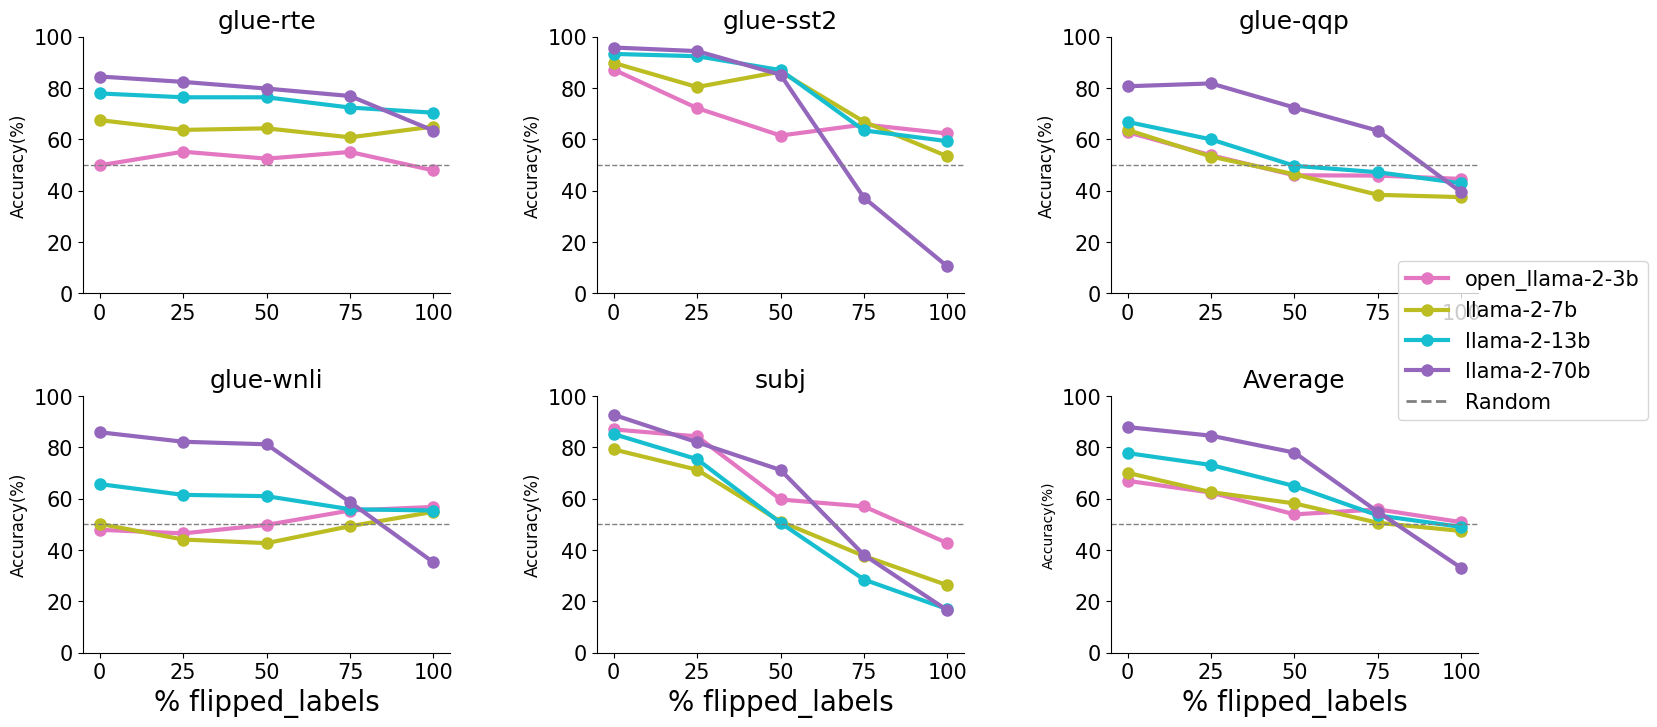

In [50]:
# Flipped labels percentages
flipped_labels = [0, 25, 50, 75, 100]

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Color map for consistency
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# colors = ['#e377c2', '#8c564b', '#17becf', '#bcbd22']
colors = ['#e377c2', '#bcbd22', '#17becf', '#9467bd']

# Titles for subplots
titles = ['glue-rte', 'glue-sst2', 'glue-qqp', 'glue-wnli', 'subj']

# Plotting each subplot
for i, title in enumerate(titles):
    ax = axs[i//3, i%3]
    for j, (model, accuracy) in enumerate(data[title].items()):
        ax.plot(flipped_labels, accuracy, marker='o', markersize=8, linewidth=3, label=model, color=colors[j])
    ax.set_title(title, fontsize = 18)
    if i >= 3:  # Only add x label for the bottom row
        ax.set_xlabel('% flipped_labels', fontsize=20)
    # ax.set_xlabel('% flipped_labels', fontsize=12)
    ax.set_ylabel('Accuracy(%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # ax.legend()
    ax.axhline(y=50, color='gray', linestyle='--', linewidth=1)  # Adding horizontal dashed line at y=50


# Average plot
average_accuracy = {
    'open_llama-2-3b': [sum(values)/5 for values in zip(*[data[title]['open_llama-2-3b'] for title in titles])],
    'llama-2-7b': [sum(values)/5 for values in zip(*[data[title]['llama-2-7b'] for title in titles])],
    'llama-2-13b': [sum(values)/5 for values in zip(*[data[title]['llama-2-13b'] for title in titles])],
    'llama-2-70b': [sum(values)/5 for values in zip(*[data[title]['llama-2-70b'] for title in titles])]
}

ax = axs[1, 2]
for j, (model, accuracy) in enumerate(average_accuracy.items()):
    ax.plot(flipped_labels, accuracy, marker='o', markersize=8, linewidth=3, label=model,  color=colors[j])
ax.set_title('Average', fontsize = 18)
ax.set_xlabel('% flipped_labels', fontsize=20)
ax.set_ylabel('Accuracy(%)')
ax.set_ylim(0, 100)
ax.tick_params(axis='both', which='major', labelsize=15)
axs[1, 2].spines['right'].set_visible(False)
axs[1, 2].spines['top'].set_visible(False)
# ax.legend()
ax.axhline(y=50, color='gray', linestyle='--', linewidth=1)  # Adding horizontal dashed line at y=50

# Adding dashed line to the legend
random_lines = [plt.Line2D([0], [0], color='gray', linewidth=2, linestyle='--')]
random_labels = ['Random']
# Combining legend into one
handles, labels = axs[0, 0].get_legend_handles_labels()

handles += random_lines
labels += random_labels
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1, 0.5), fontsize=15)

plt.savefig('camera.pdf')  # Save as PNG format
plt.show()